In [1]:
library(Hmisc)
library(MESS)
library(data.table)

## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix


In [2]:
library(dplyr)
library(ggplot2)
if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggExtra
Warning message:
"package 'ggExtra' was built under R version 3.5.2"Loading required package: naniar
Warning message:
"package 'naniar' was built under R version 3.5.2"Loading required package: mvoutlier
Warning message:
"package 'mvoutlier' was built under R version 3.5.2"Loading required package: sgeostat
Warning message:
"package 'sgeostat' was built under R version 3.5.2"sROC 0.1-2 loaded
Loading required package: MissMech
Warning message:
"package 'MissMech' was built under R version 3.5.2"Loading required package: mice
Warning message:
"package 'mice' was built under R version 3.5.2"
Attachin

In [3]:
ffWNV2 <- read.csv(file="C:/Users/Chen/Project/data/ffWNV2.csv")

In [39]:
describe(ffWNV2)

ffWNV2 

 69  Variables      4616  Observations
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0     4616        1     2308     1539    231.8    462.5 
     .25      .50      .75      .90      .95 
  1154.8   2308.5   3462.2   4154.5   4385.2 

lowest :    1    2    3    4    5, highest: 4612 4613 4614 4615 4616
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    4616        0       95 

lowest : 2007-05-29 2007-06-05 2007-06-26 2007-06-29 2007-07-02
highest: 2013-08-29 2013-09-06 2013-09-12 2013-09-19 2013-09-26
--------------------------------------------------------------------------------
Month_Yr 
       n  missing distinct 
    4616        0       20 

2007-05 (18, 0.004), 2007-06 (120, 0.026), 2007-07 (260, 0.056), 2007-08 (574,
0.124), 2007-09 (382, 0.083), 2007-10 (105, 0.023), 2009-05 

In [40]:
str(ffWNV2)

'data.frame':	4616 obs. of  69 variables:
 $ ID                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                  : Factor w/ 95 levels "2007-05-29","2007-06-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ CULEX_PIPIENS_RESTUANS: int  1 0 0 0 0 0 1 2 1 0 ...
 $ CULEX_RESTUANS        : int  2 1 1 1 2 3 0 3 1 5 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0

Categorial var

In [45]:
#catff2<-ffWNV2

In [42]:
catvar<-c('BR', 'DZ' ,'FG', 'HZ' ,'RA', 'TS', 'TSRA', 'VCTS','BR2', 'DZ2' ,'FG2' ,'HZ2', 'RA2' ,'TS2', 'TSRA2' ,'VCTS2' ,'Spray','Snow_Fall','Season_code', 'TrapM')

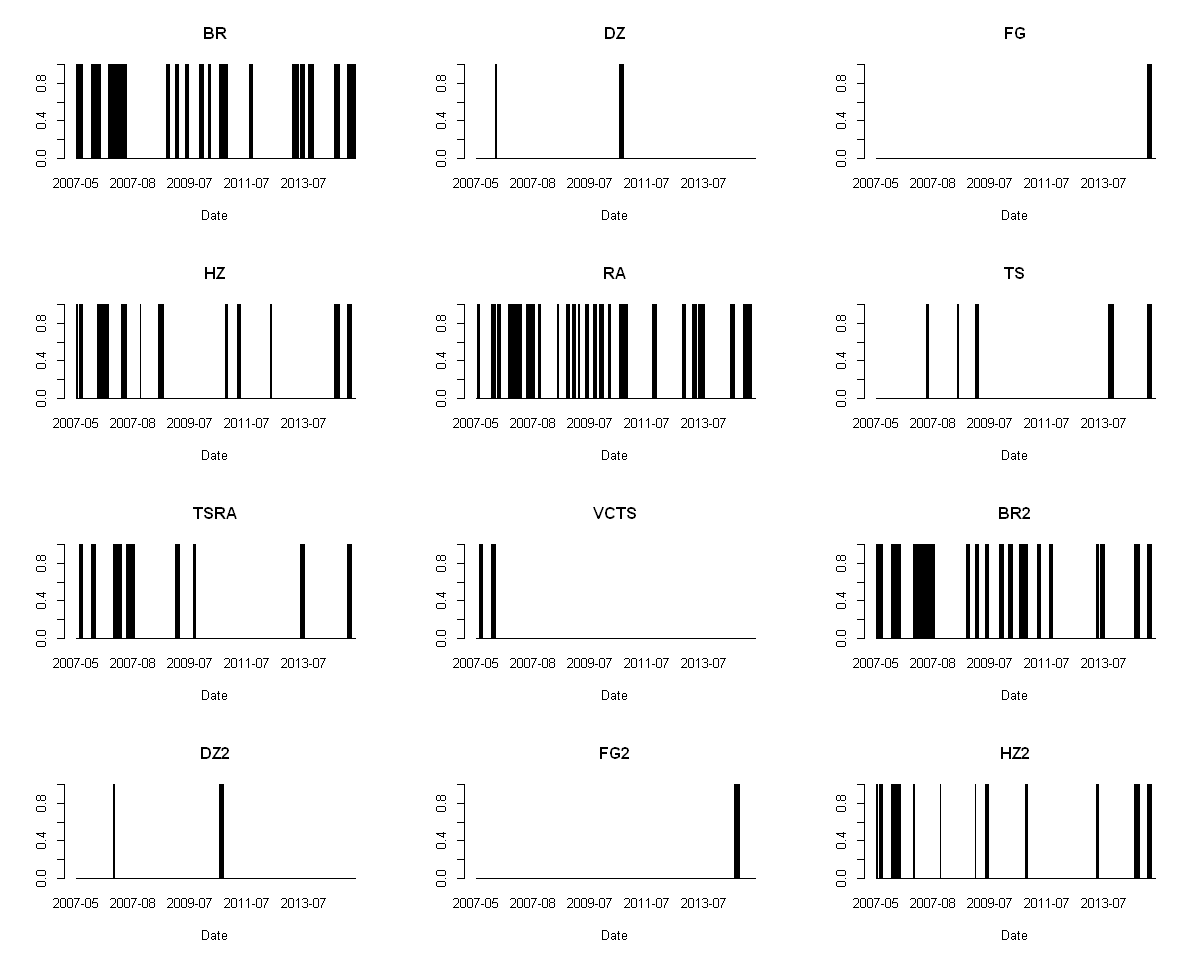

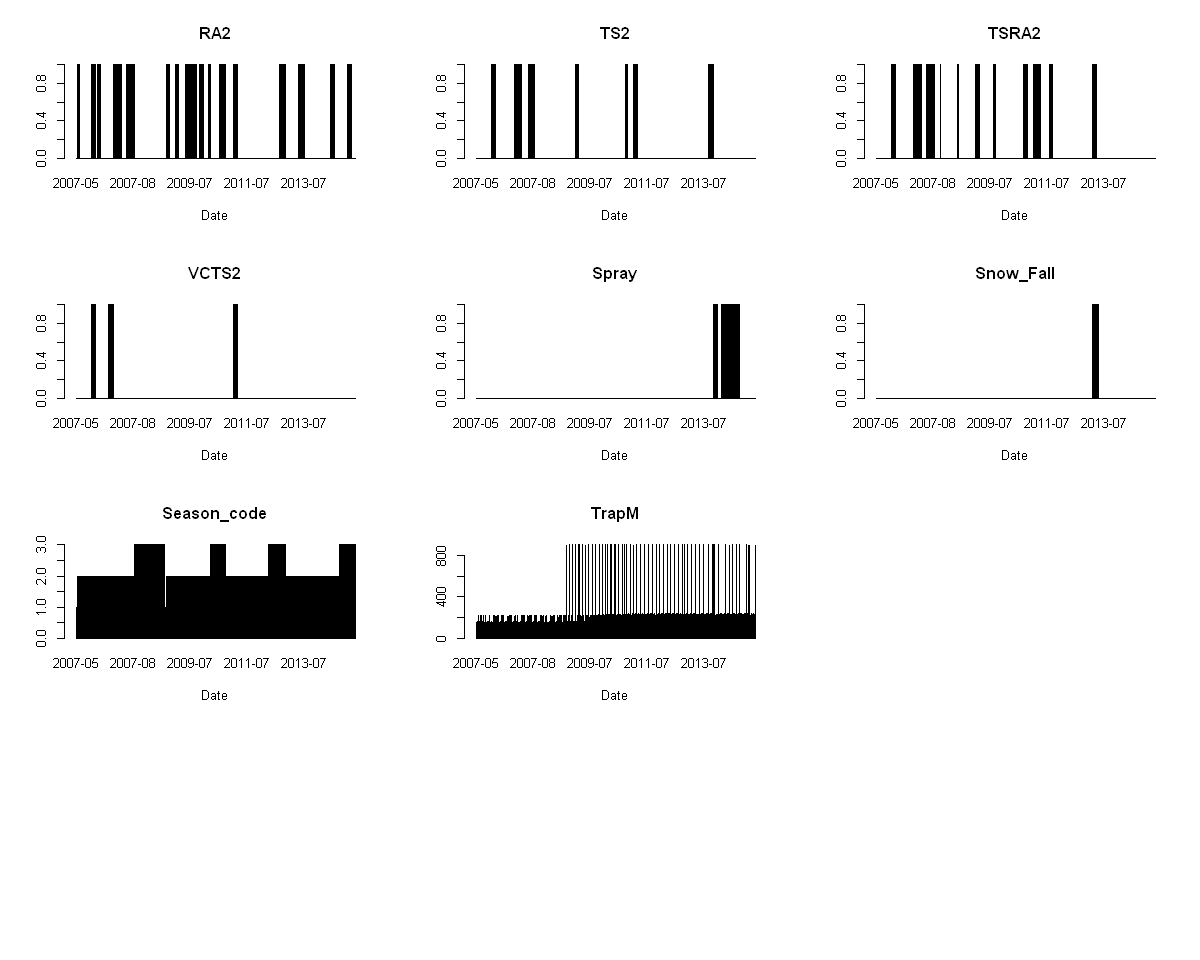

In [43]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[catvar])) {
    barplot(ffWNV2[[v]], names.arg=ffWNV2$Month_Yr, main=v, xlab="Date" )
}
par(mfrow=c(1,1))

ffWNV2$BR<-factor(ffWNV2$BR) 
ffWNV2$BR2 <-factor(ffWNV2$BR2)
ffWNV2$DZ <-factor(ffWNV2$DZ)
ffWNV2$DZ2 <-factor(ffWNV2$DZ2)
ffWNV2$FG <-factor(ffWNV2$FG)
ffWNV2$FG2 <-factor(ffWNV2$FG2)
ffWNV2$RA <-factor(ffWNV2$RA)
ffWNV2$RA2 <-factor(ffWNV2$RA2)
ffWNV2$TS <-factor(ffWNV2$TS)
ffWNV2$TS2 <-factor(ffWNV2$TS2)
ffWNV2$FG <-factor(ffWNV2$FG)
ffWNV2$FG2 <-factor(ffWNV2$FG2)
ffWNV2$TSRA <-factor(ffWNV2$TSRA)
ffWNV2$TSRA2 <-factor(ffWNV2$TSRA2)
ffWNV2$VCTS <-factor(ffWNV2$VCTS)
ffWNV2$VCTS2 <-factor(ffWNV2$VCTS2)


In [41]:
colnames(ffWNV2)

[1] "ID"                     "Date"                   "Month_Yr"              
 [4] "Address"                "Block"                  "Latitude"              
 [7] "Longitude"              "Street"                 "CULEX_ERRATICUS"       
[10] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[13] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[16] "WnvPresent"             "Month"                  "Tmax"                  
[19] "Tmin"                   "Tavg"                   "Depart"                
[22] "DewPoint"               "WetBulb"                "Heat"                  
[25] "Cool"                   "Sunrise"                "Sunset"                
[28] "PrecipTotal"            "StnPressure"            "SeaLevel"              
[31] "ResultSpeed"            "ResultDir"              "AvgSpeed"              
[34] "BR"                     "DZ"                     "FG"                    
[37] "HZ"                     "RA"                     "TS"                    
[40] "TSRA"                   "VCTS"                   "Tmax2"                 
[43] "Tmin2"                  "Tavg2"                  "DewPoint2"             
[46] "WetBulb2"               "Heat2"                  "Cool2"                 
[49] "PrecipTotal2"           "StnPressure2"           "SeaLevel2"             
[52] "ResultSpeed2"           "ResultDir2"             "AvgSpeed2"             
[55] "BR2"                    "DZ2"                    "FG2"                   
[58] "HZ2"                    "RA2"                    "TS2"                   
[61] "TSRA2"                  "VCTS2"                  "ParasiticIn."          
[64] "Influenza."             "Spray"                  "Year"                  
[67] "Season_code"            "TrapM"                  "Snow_Fall"

In [5]:
mosvar<-c('CULEX_ERRATICUS', 'CULEX_PIPIENS' ,'CULEX_PIPIENS_RESTUANS', 'CULEX_RESTUANS' ,'CULEX_SALINARIUS', 'CULEX_TARSALIS' ,'CULEX_TERRITANS' ,'WnvPresent')

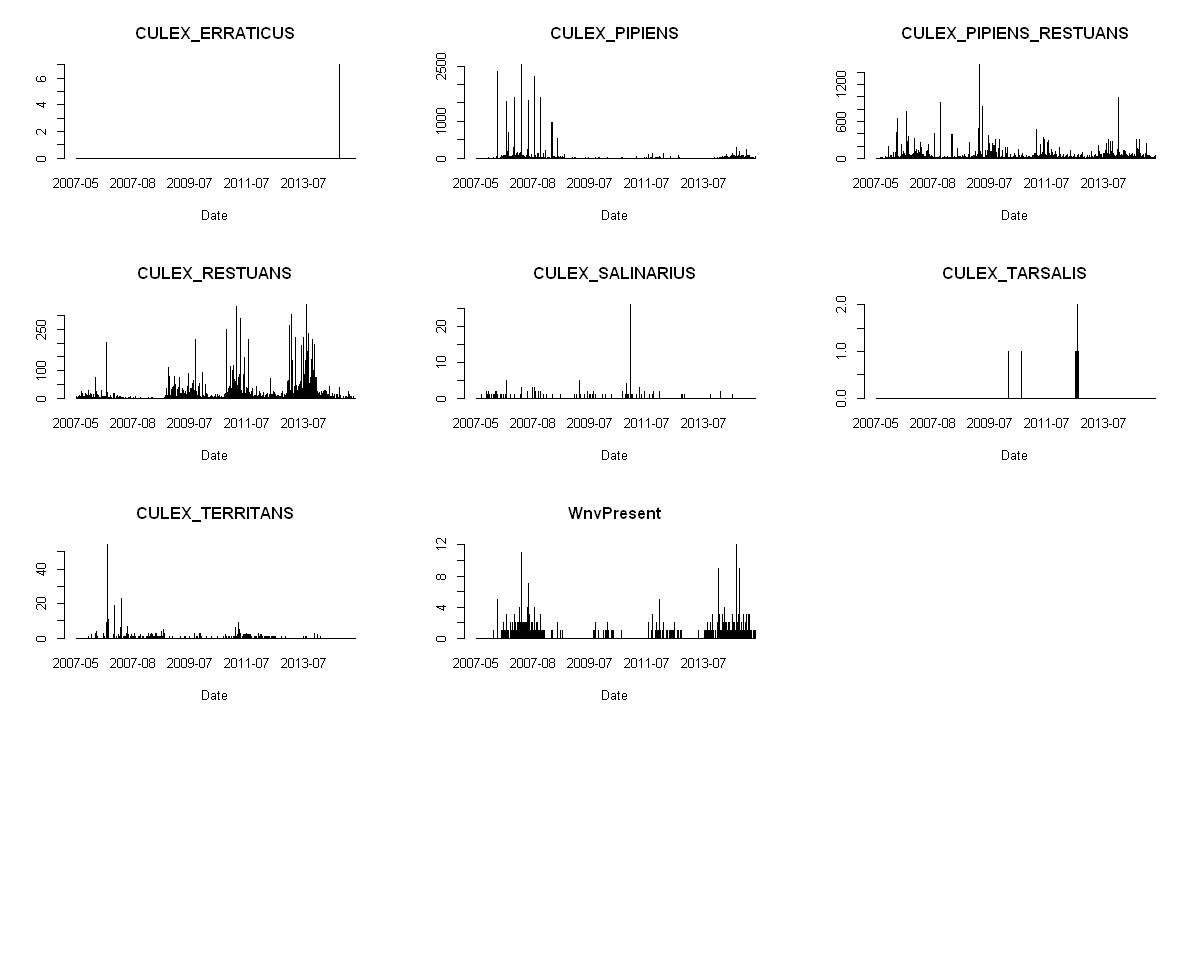

In [70]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[mosvar])) {
    barplot(ffWNV2[[v]], names.arg=ffWNV2$Month_Yr, main=v, xlab="Date" )
}
par(mfrow=c(1,1))

Numeric var

In [6]:
numvar<-c('Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Tmax2', 'Tmin2', 'Tavg2', 'DewPoint2', 'WetBulb2', 'Heat2', 'Cool2', 'PrecipTotal2' ,'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2', 'ParasiticIn.' ,'Influenza.'  )

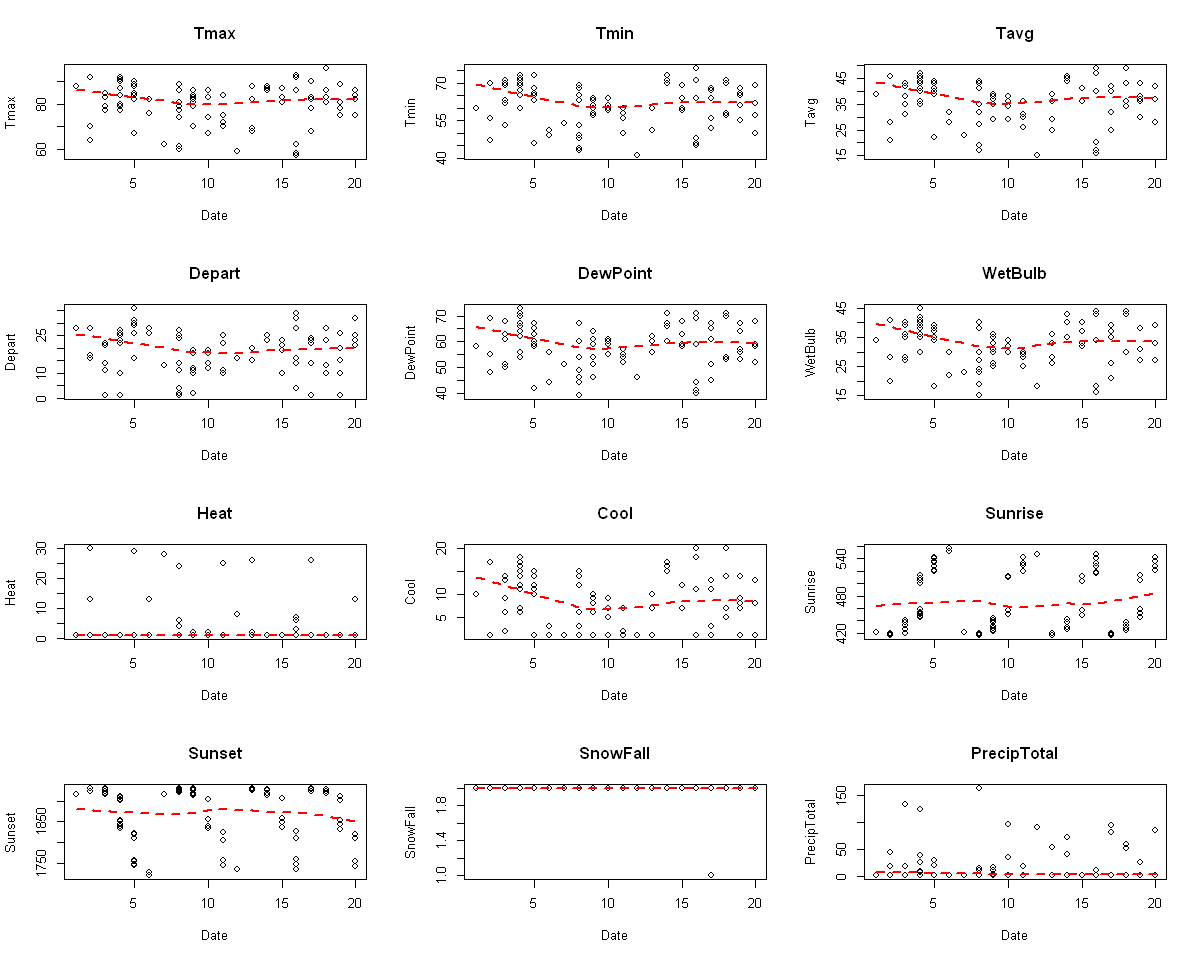

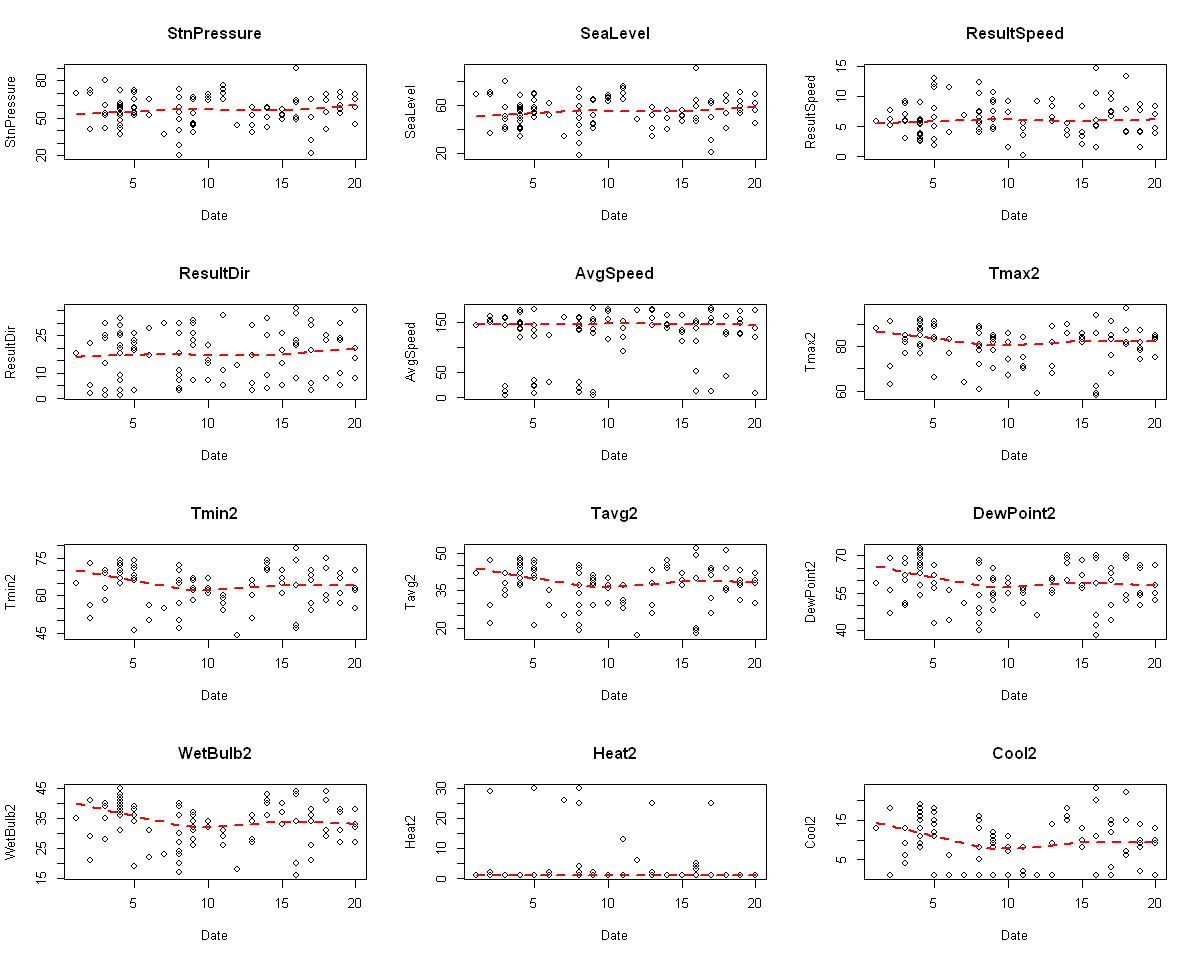

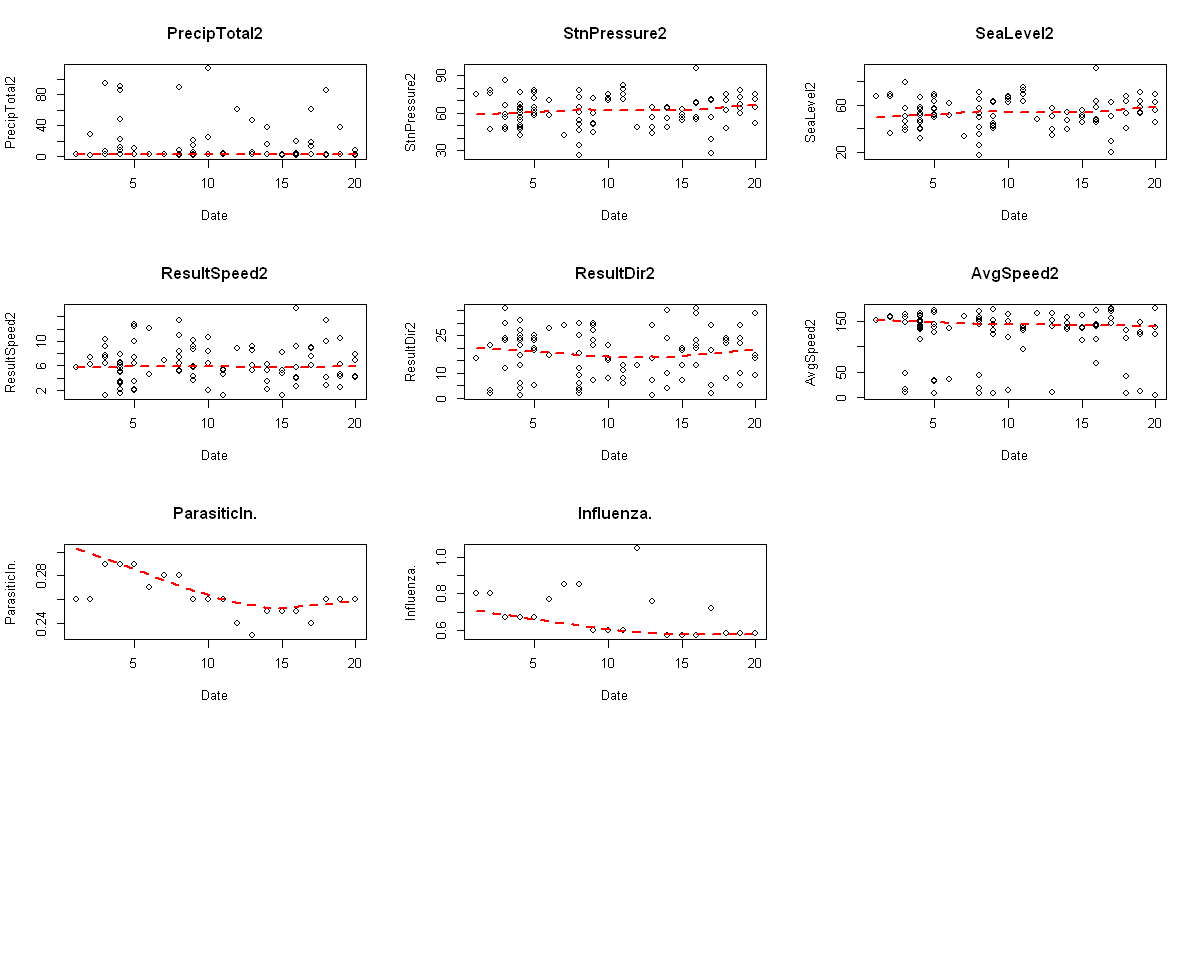

In [73]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    scatter.smooth(ffWNV2[[v]] ~ ffWNV2$Month_Yr, main=v, xlab="Date",ylab=v, family="symmetric",
                  lpars =list(col = "red", lwd = 2, lty = 2))
}
par(mfrow=c(1,1))

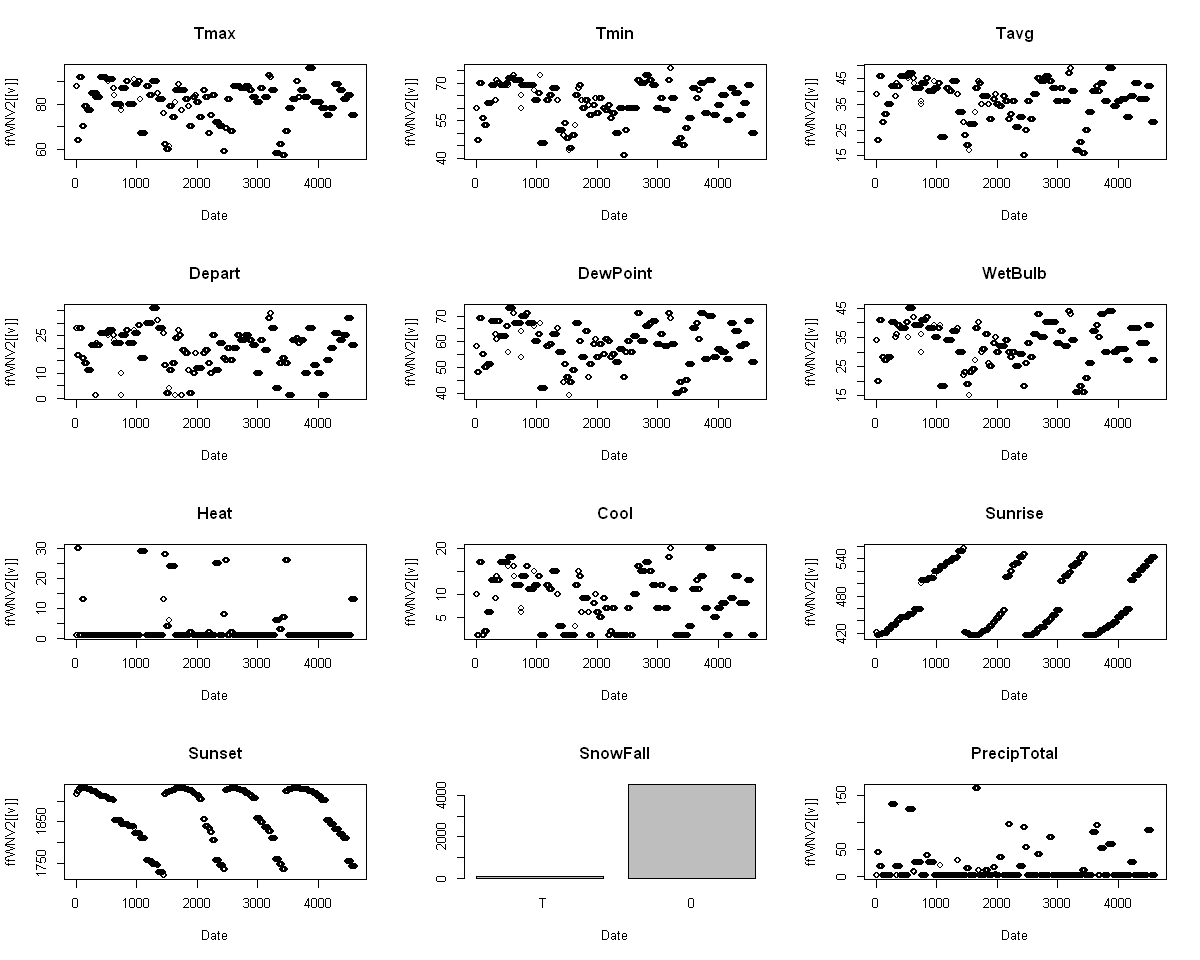

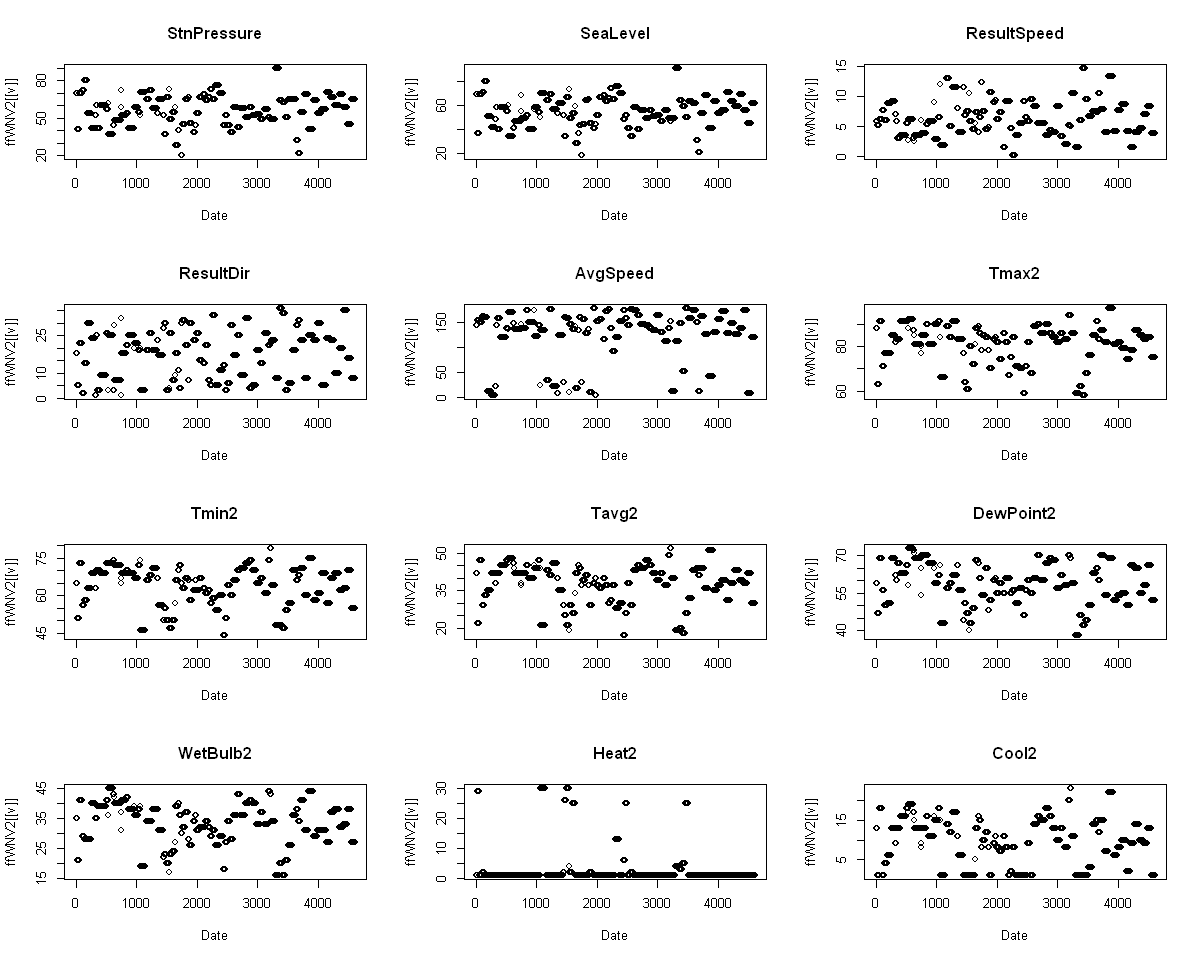

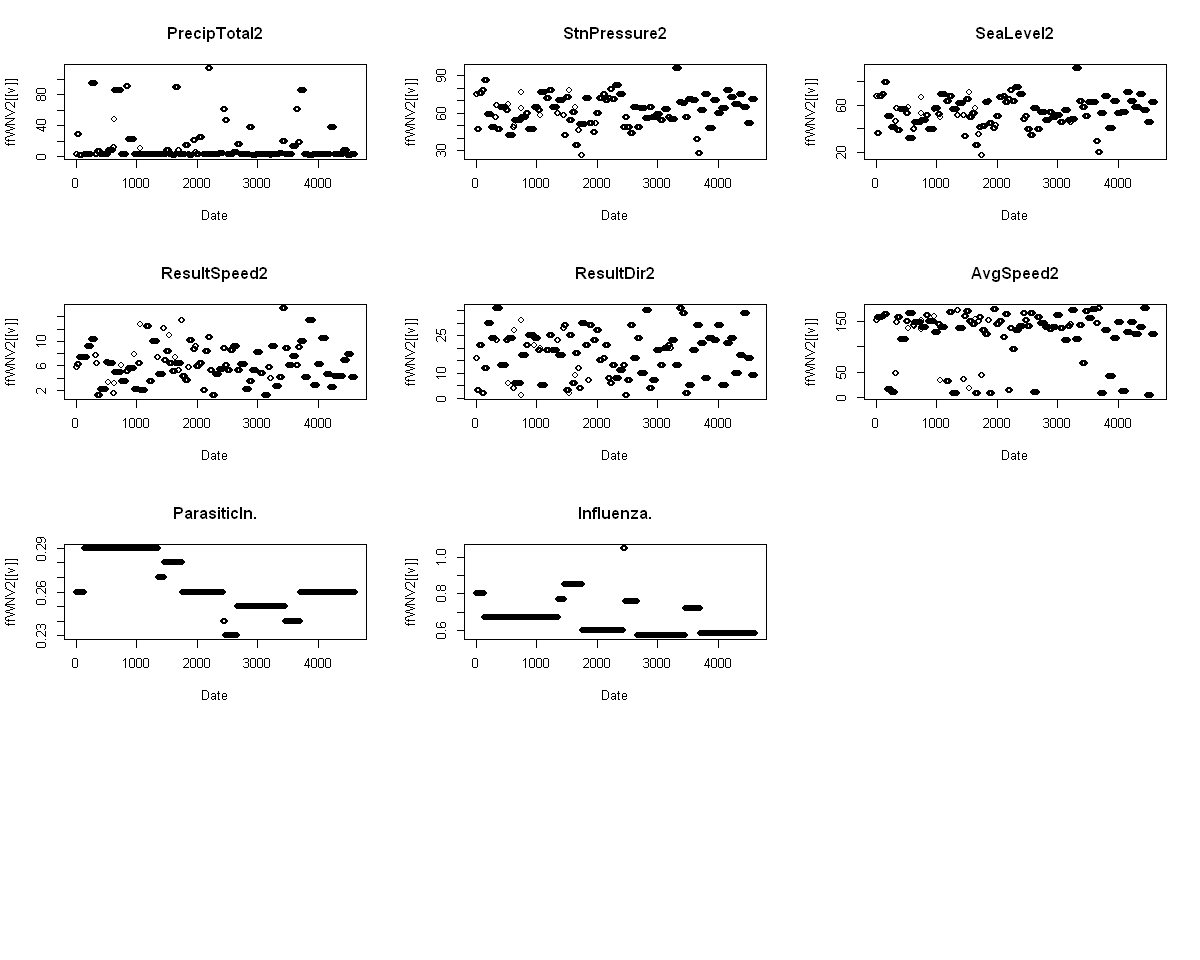

In [78]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    plot(ffWNV2[[v]], main=v, xlab="Date" )
}
par(mfrow=c(1,1))

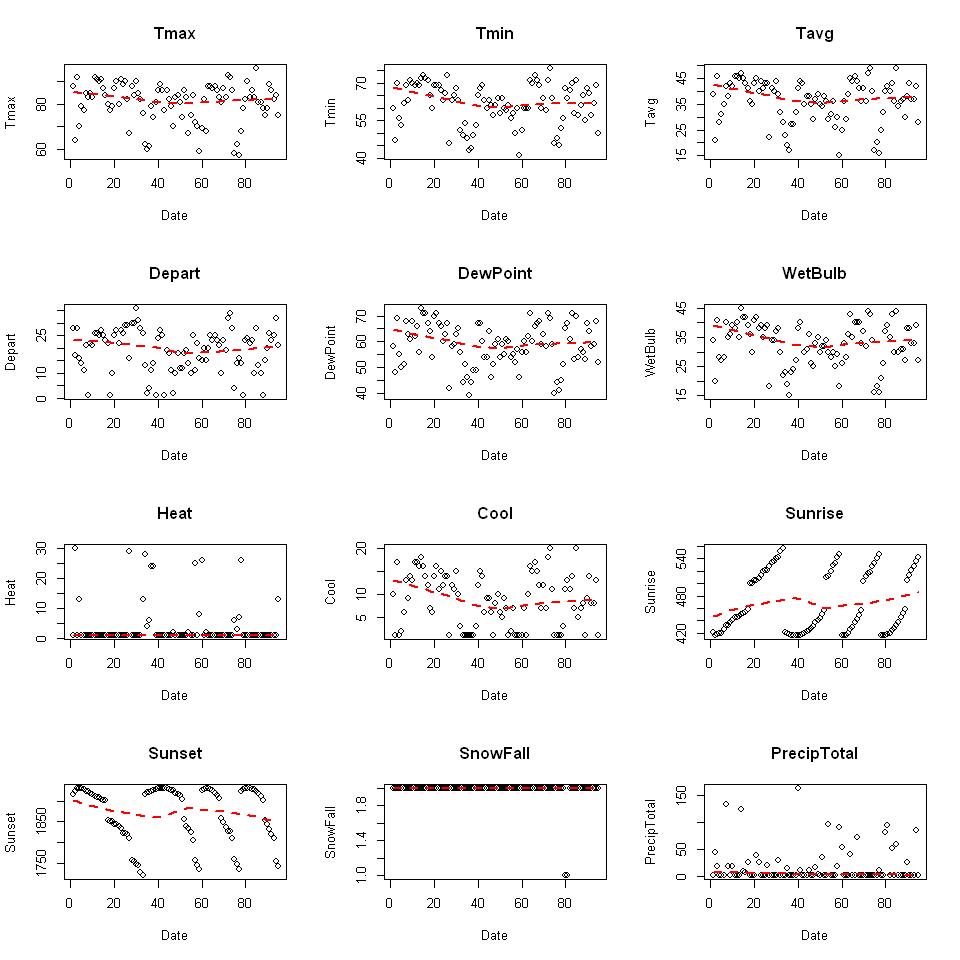

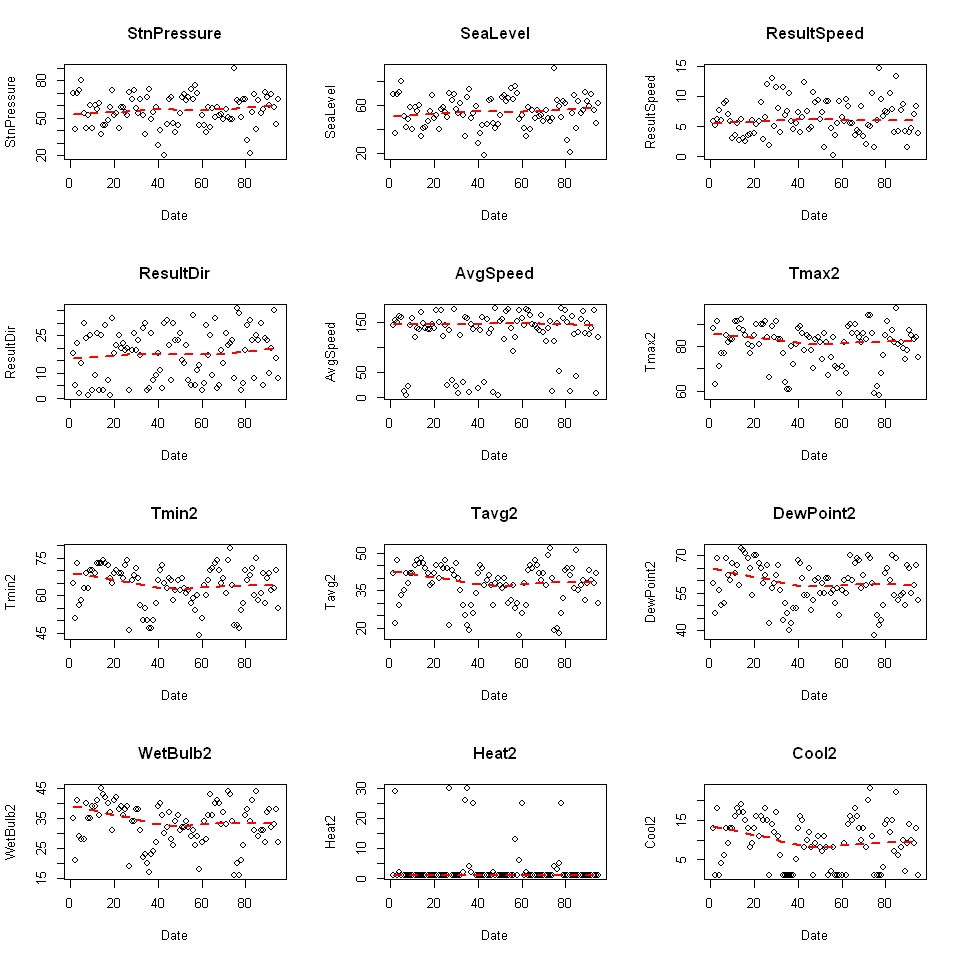

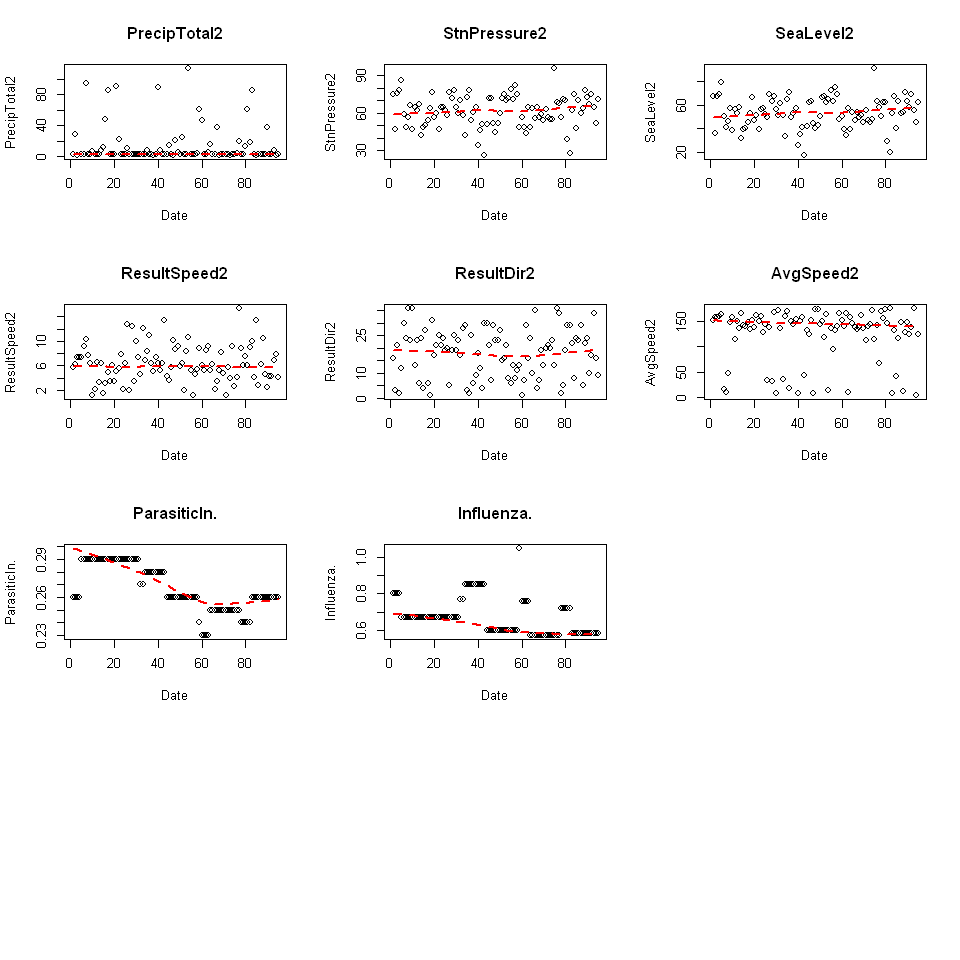

In [84]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    scatter.smooth(ffWNV2[[v]] ~ ffWNV2$Date, main=v, xlab="Date",ylab=v, family="symmetric",
                  lpars =list(col = "red", lwd = 2, lty = 2))
}
par(mfrow=c(1,1))

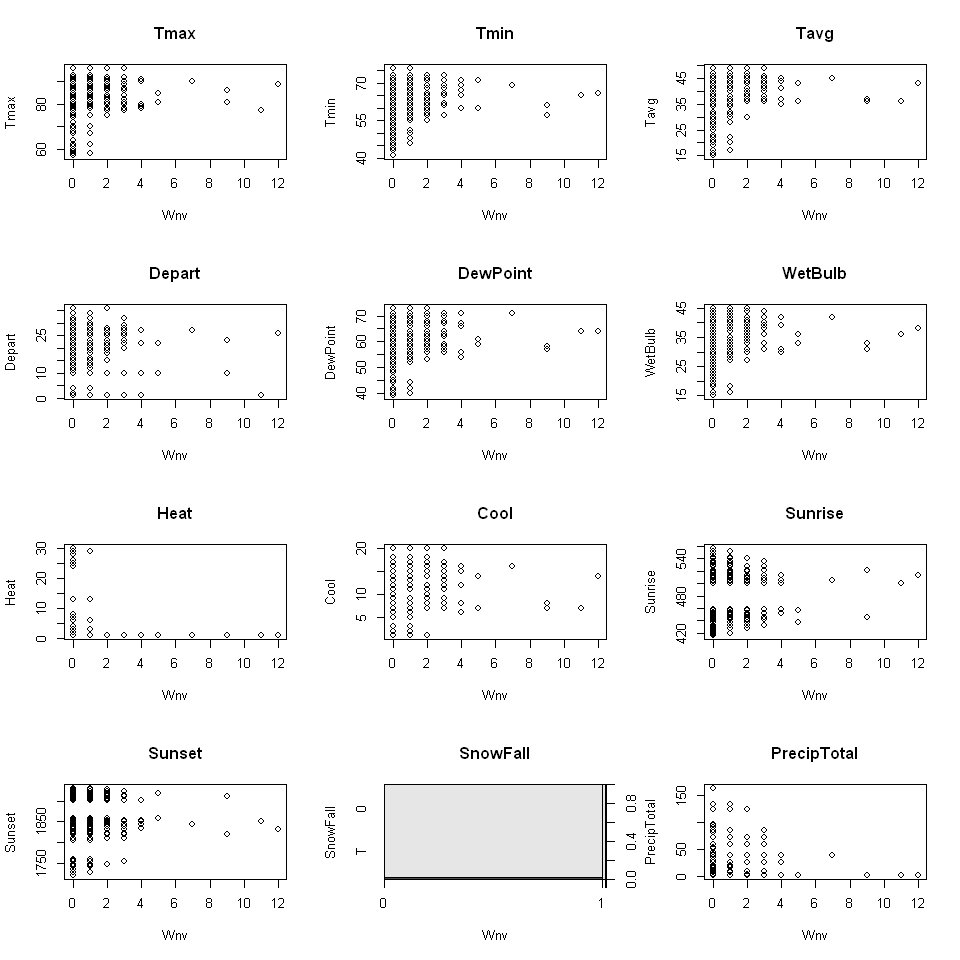

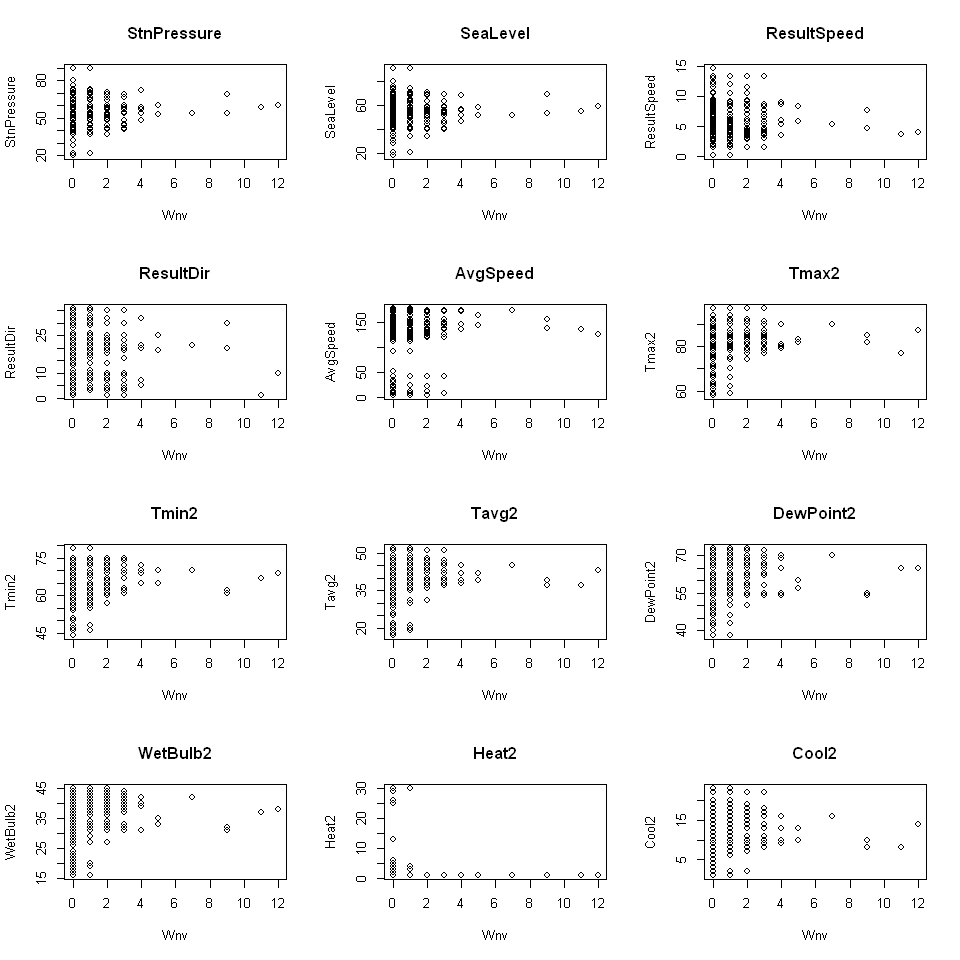

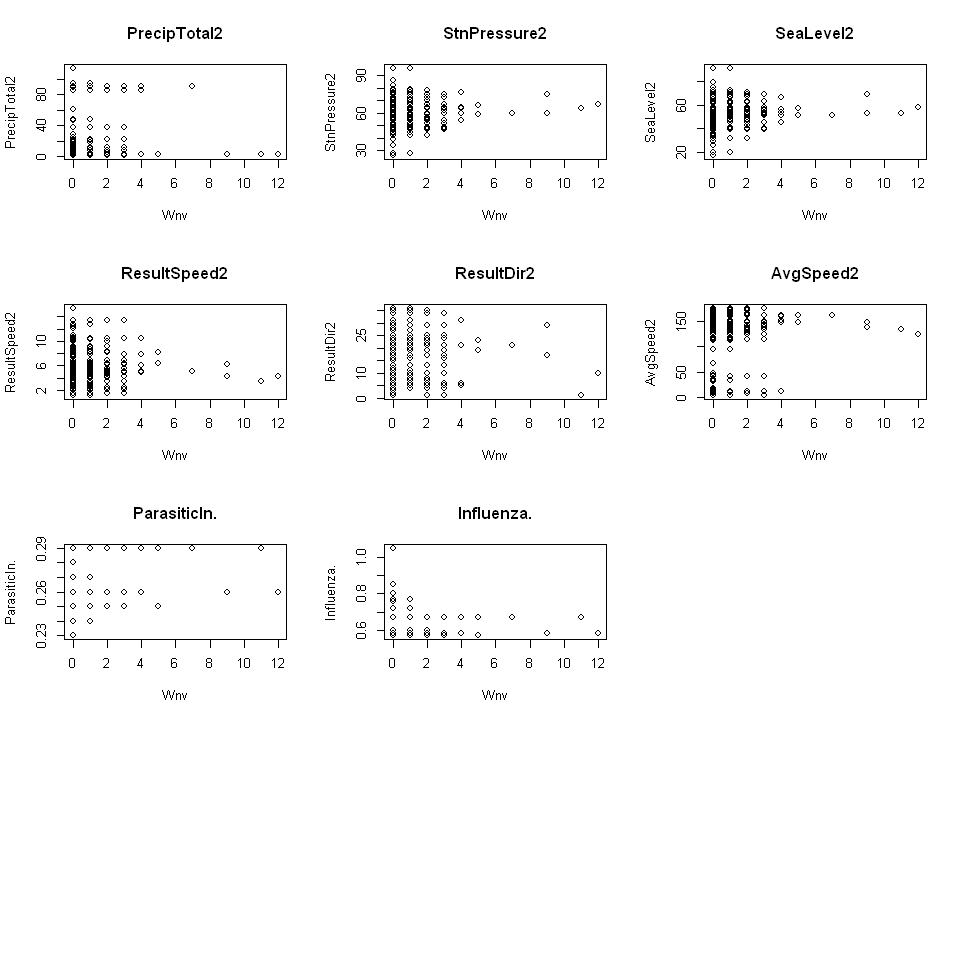

In [90]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    scatterplot(ffWNV2[[v]] ~ ffWNV2$WnvPresent, main=v, xlab="Wnv",ylab=v)
}
par(mfrow=c(1,1))

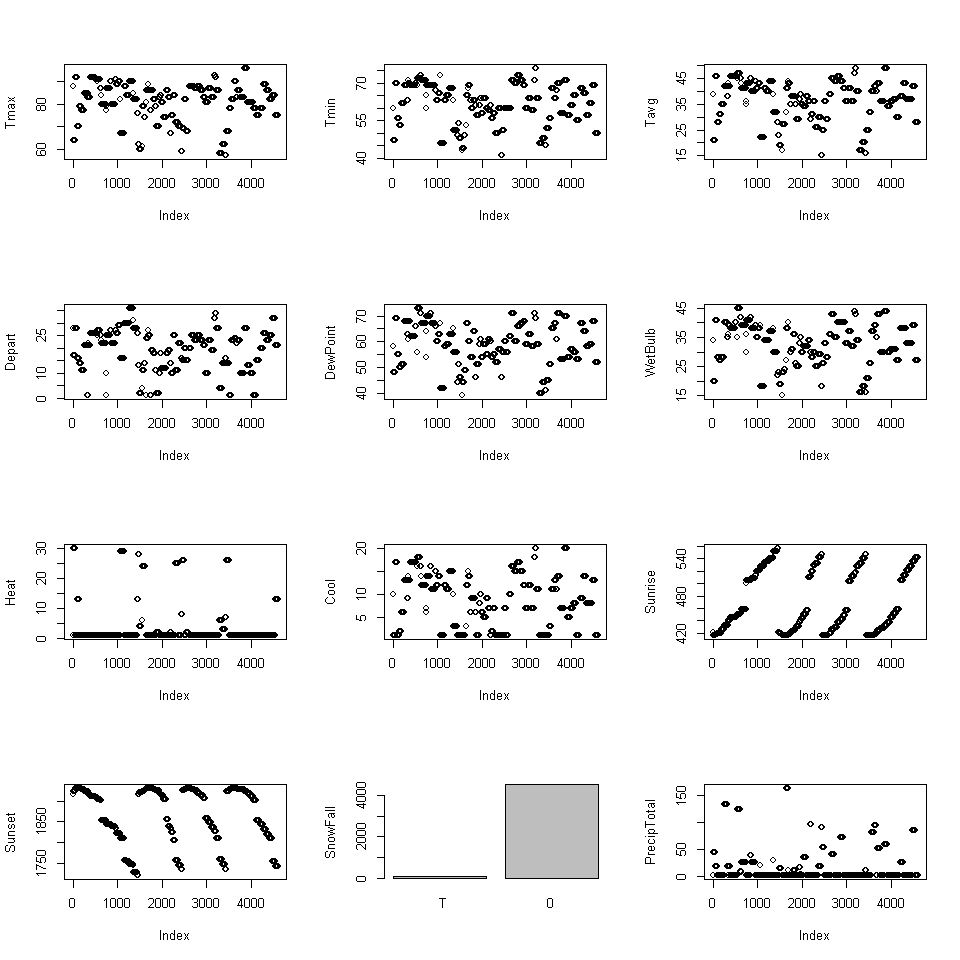

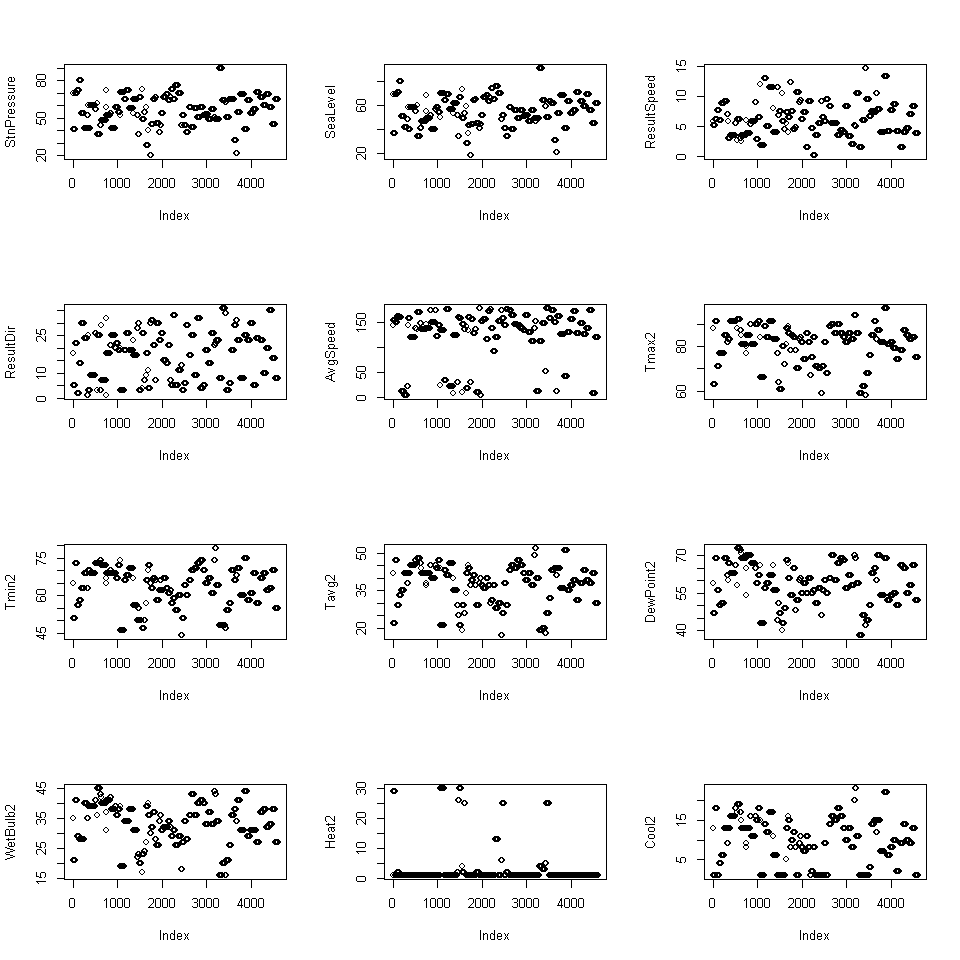

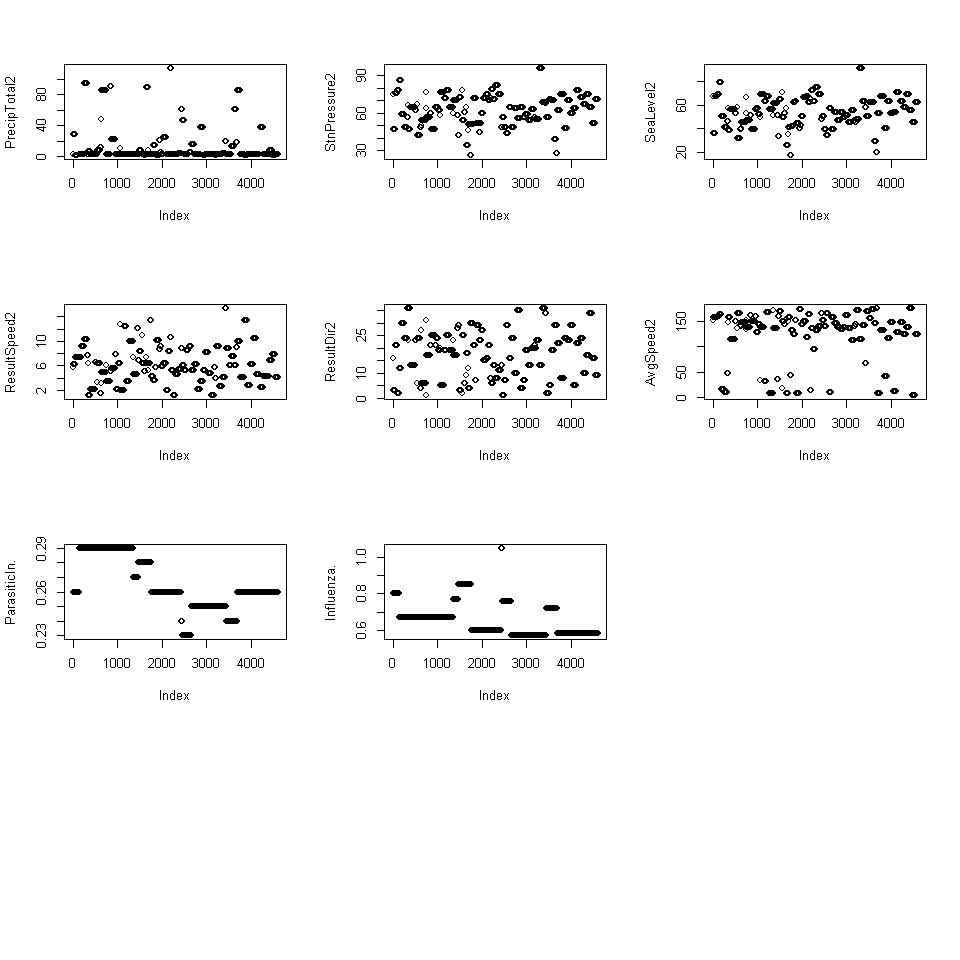

In [91]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    plot(ffWNV2[[v]],ylab=v)
}
par(mfrow=c(1,1))

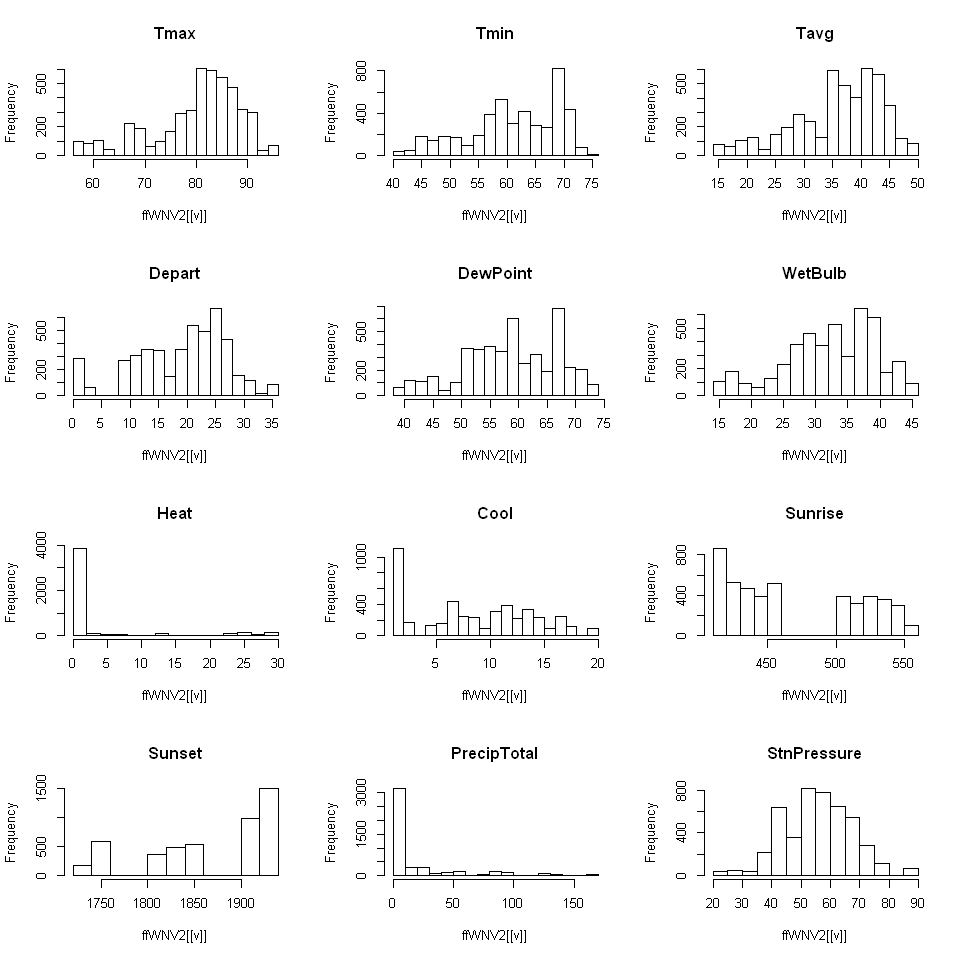

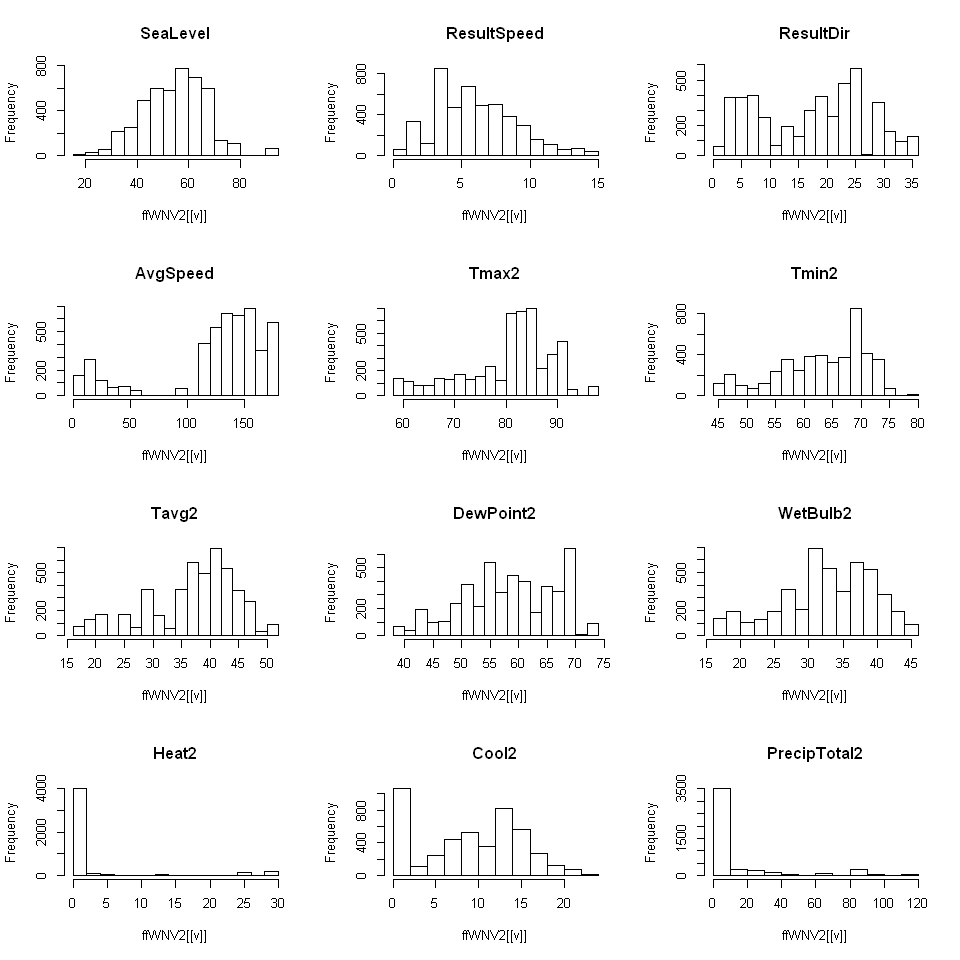

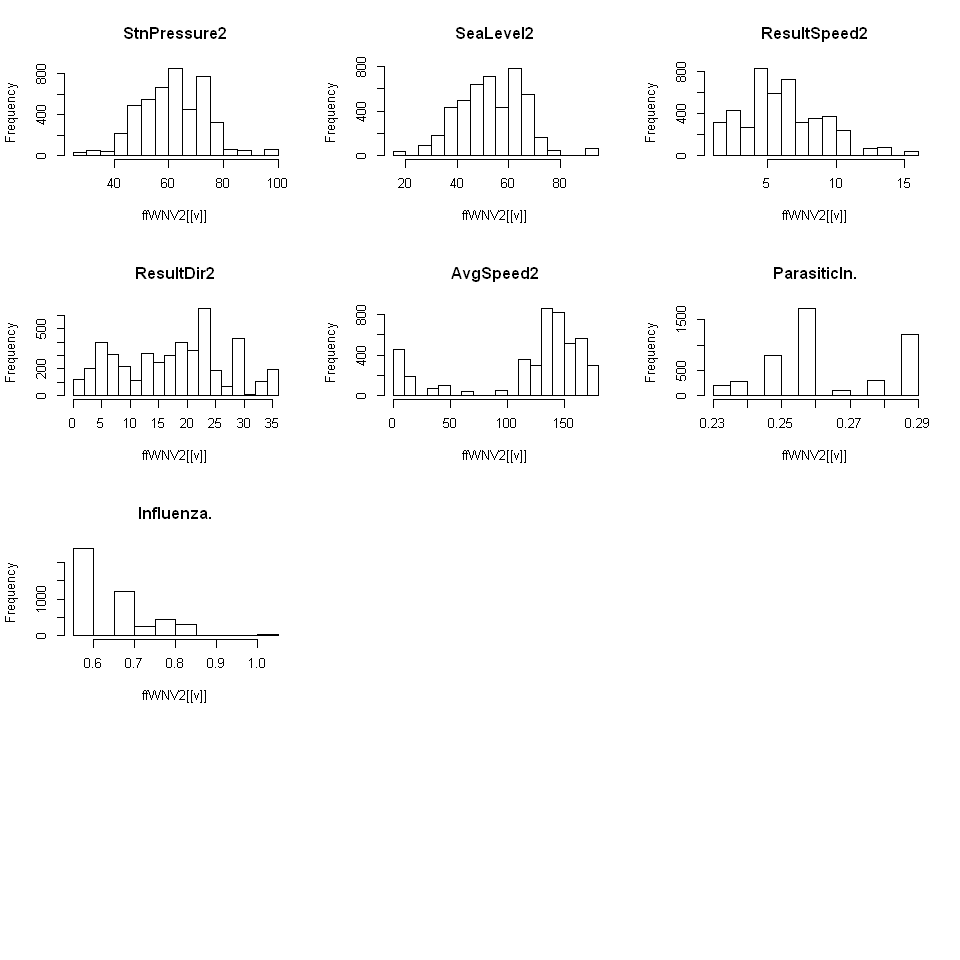

In [96]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    hist(ffWNV2[[v]],main=v)
}
par(mfrow=c(1,1))

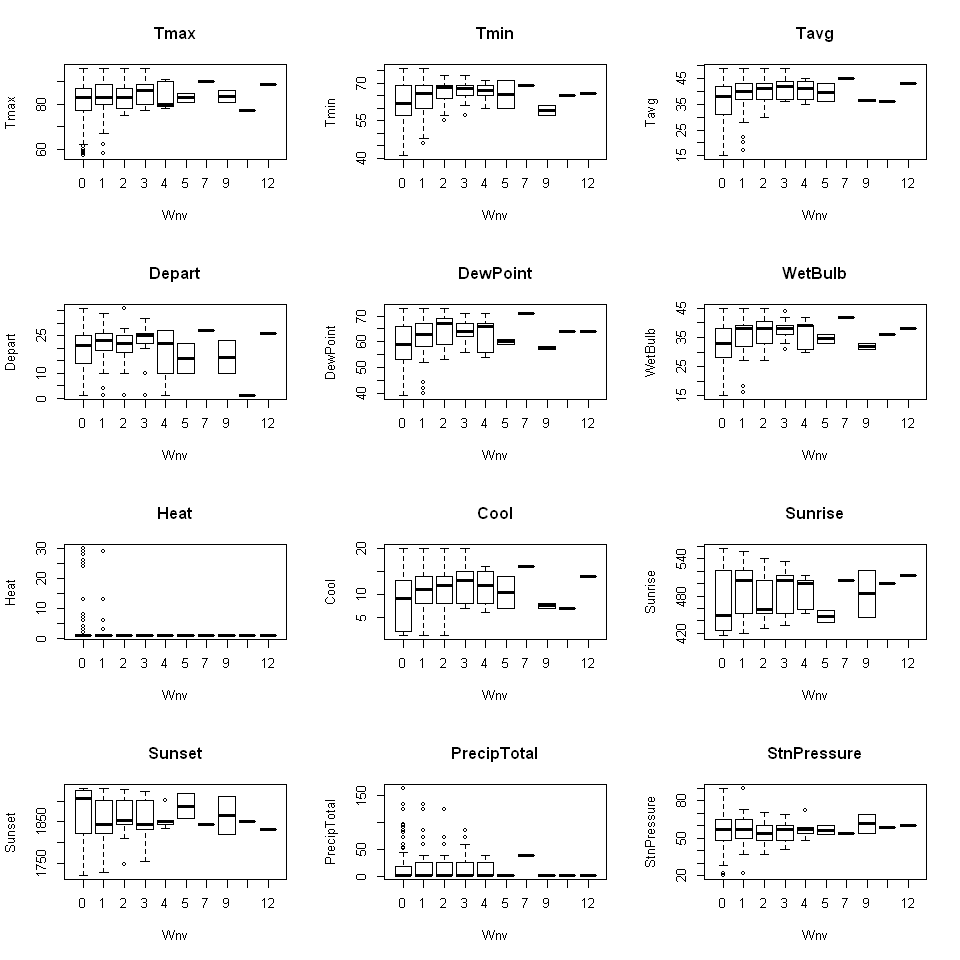

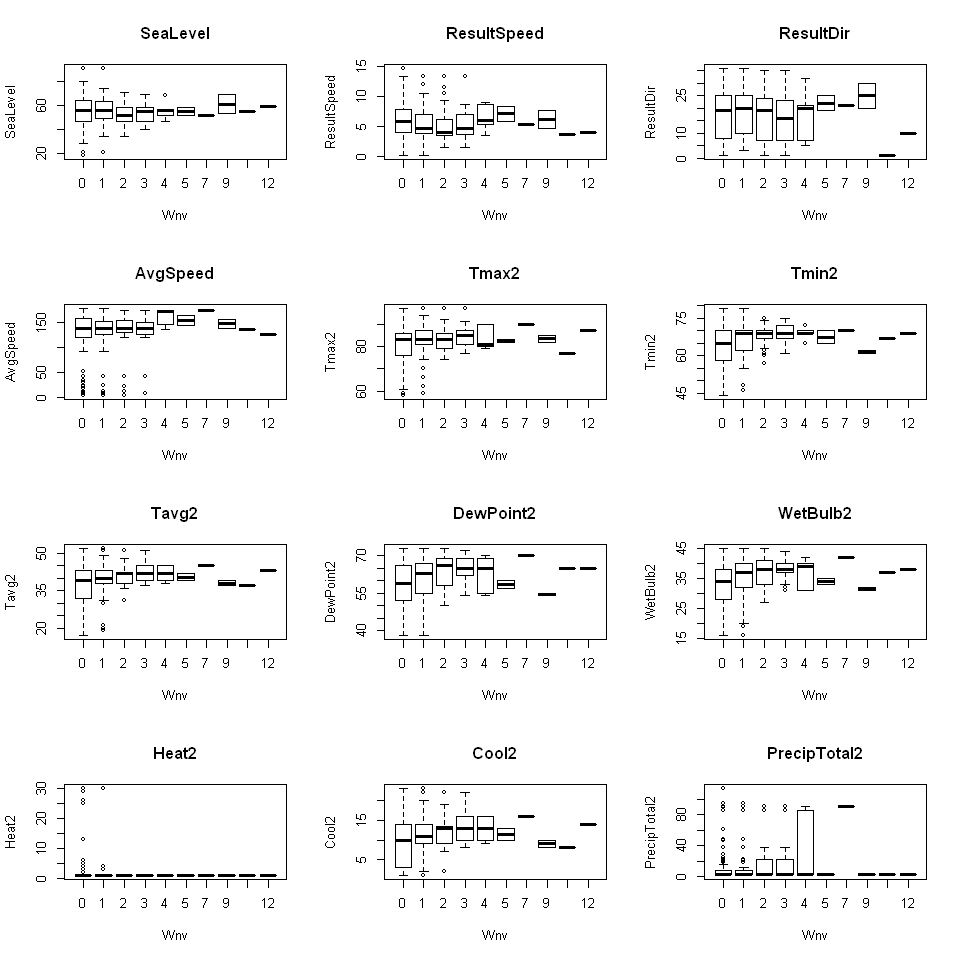

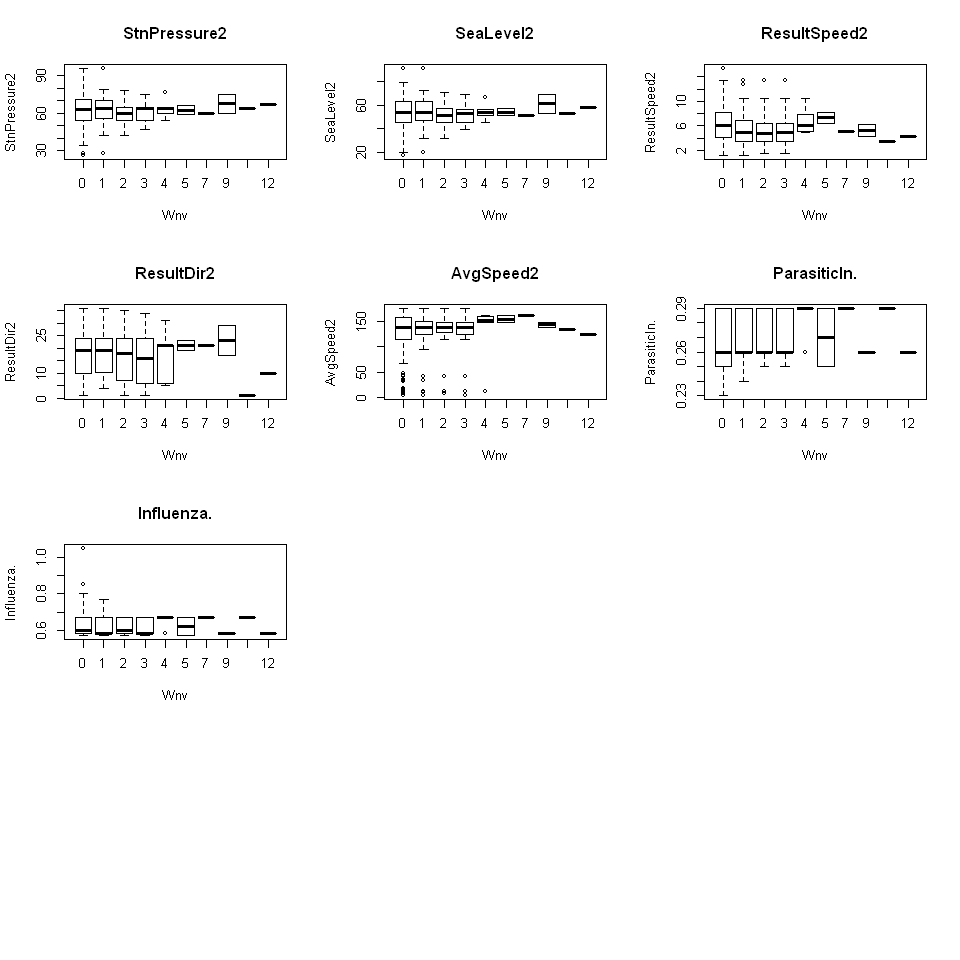

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[numvar])) {
    boxplot(ffWNV2[[v]] ~ ffWNV2$WnvPresent, main=v, xlab="Wnv",ylab=v)
}
par(mfrow=c(1,1))

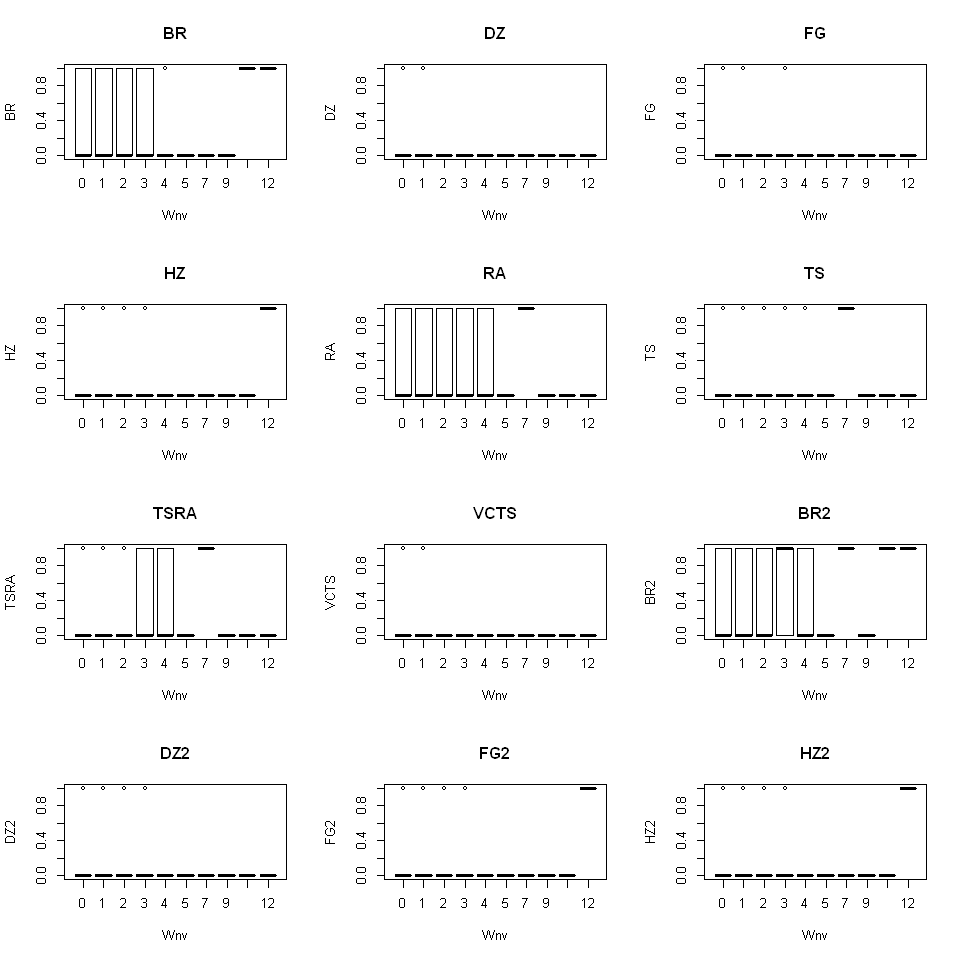

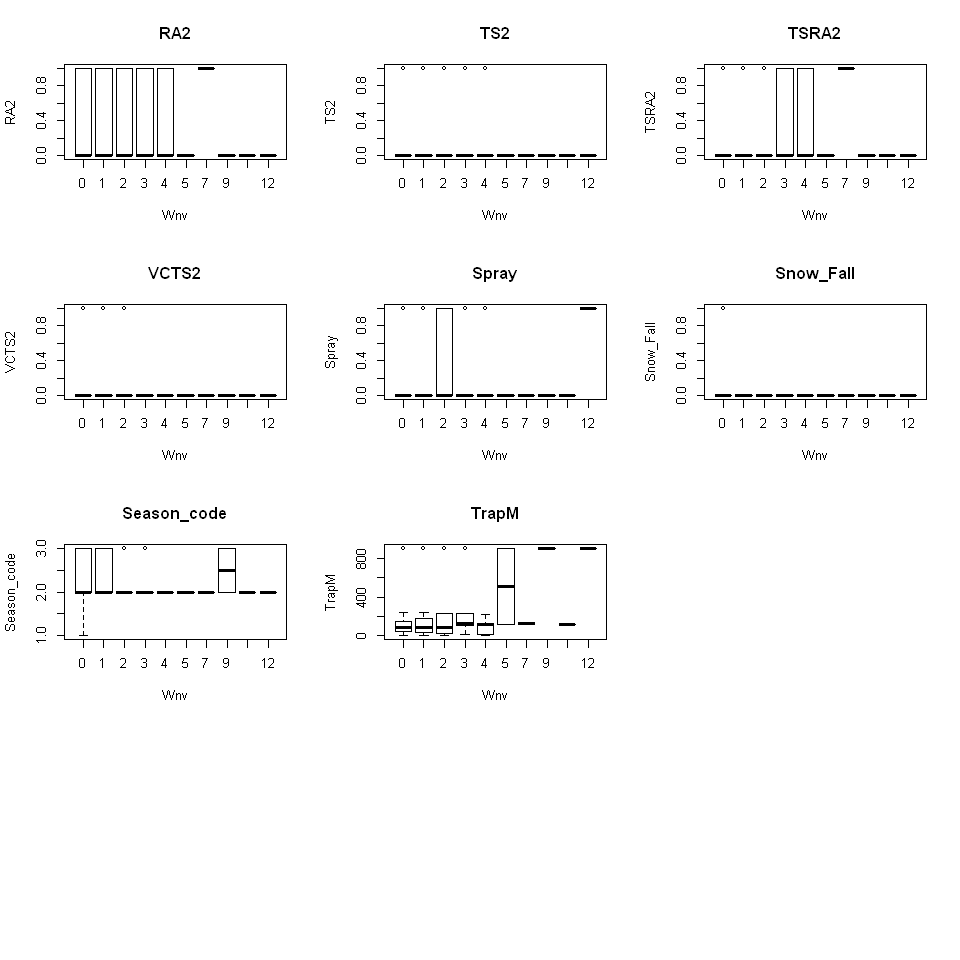

In [44]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[catvar])) {
    boxplot(ffWNV2[[v]] ~ ffWNV2$WnvPresent, main=v, xlab="Wnv",ylab=v)
}
par(mfrow=c(1,1))

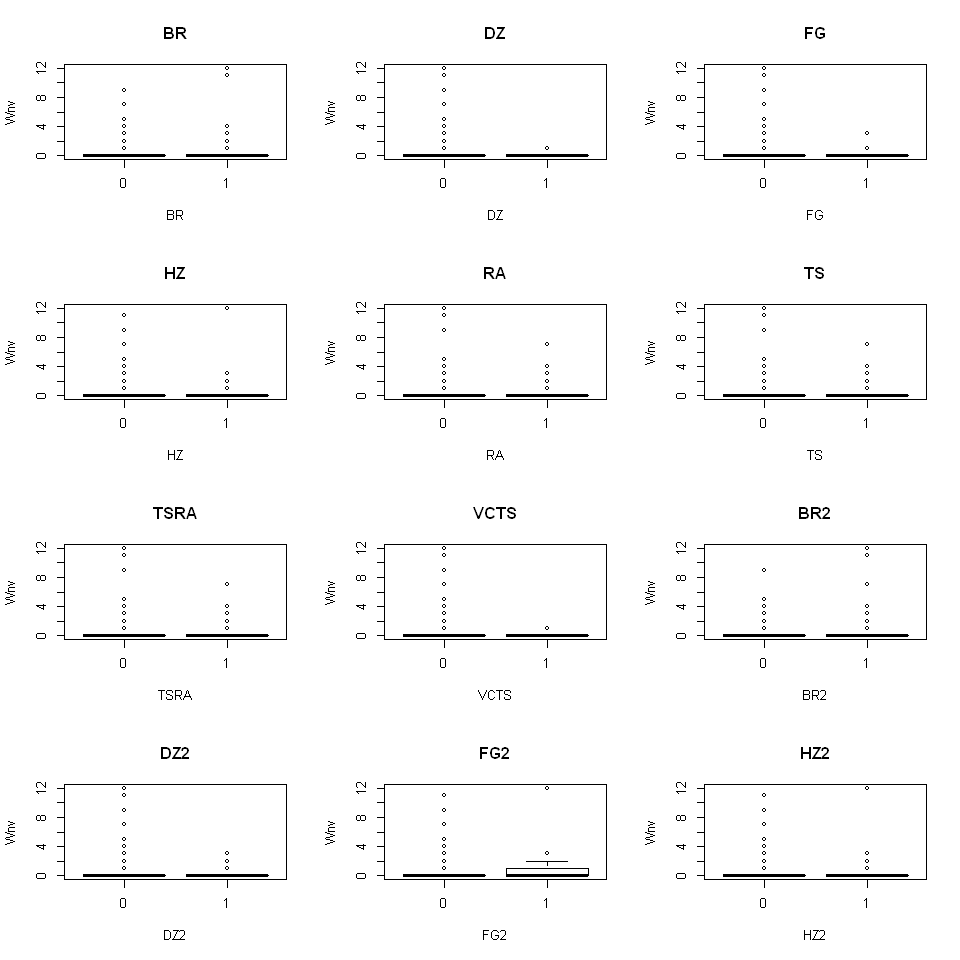

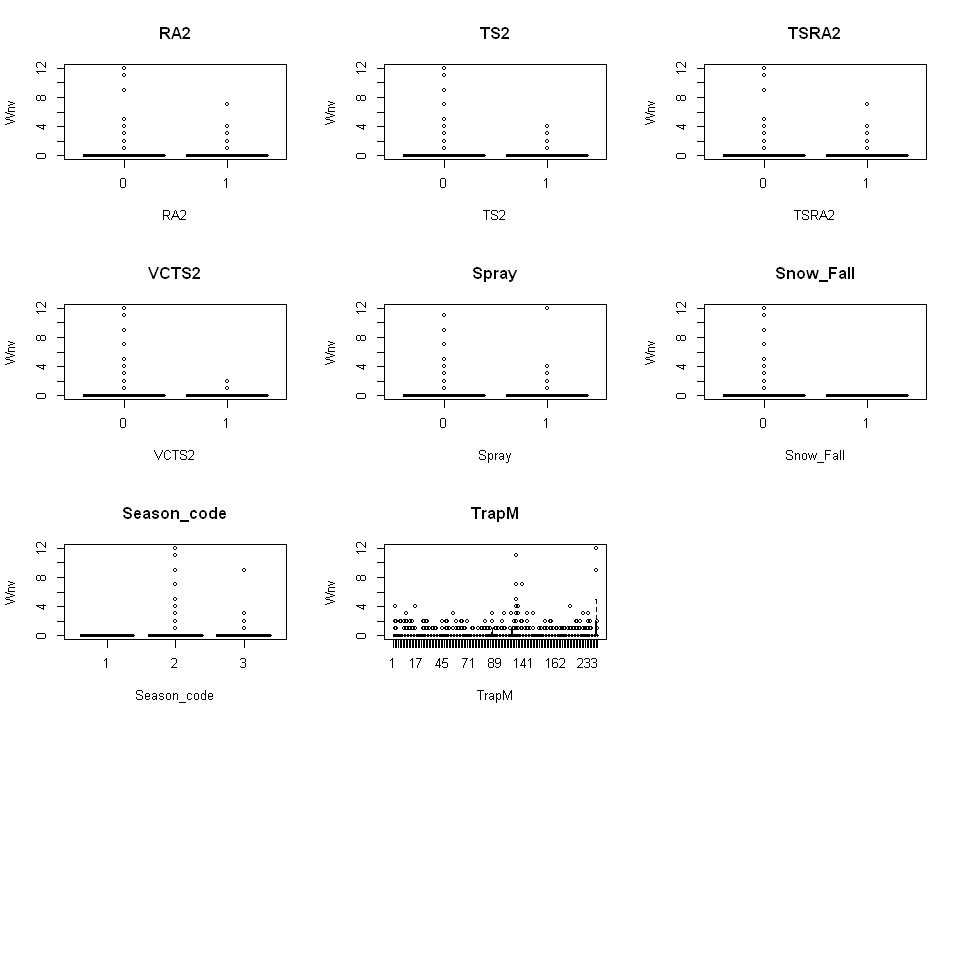

In [45]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(ffWNV2[catvar])) {
    boxplot(ffWNV2$WnvPresent~ffWNV2[[v]], main=v, xlab=v,ylab="Wnv")
}
par(mfrow=c(1,1))

[1] 0


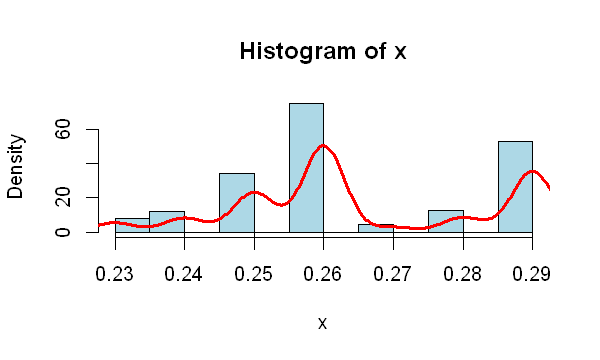

In [19]:
x <- ffWNV2$ParasiticIn.
plotDistribution = function (x) {
  N = length(x)
  x <- na.omit(x)
  hist( x,col = "light blue",
        probability = TRUE)
  lines(density(x), col = "red", lwd = 3)
  rug(x)
  print(N-length(x))
}
plotDistribution(x)

png 
  3

png 
  2

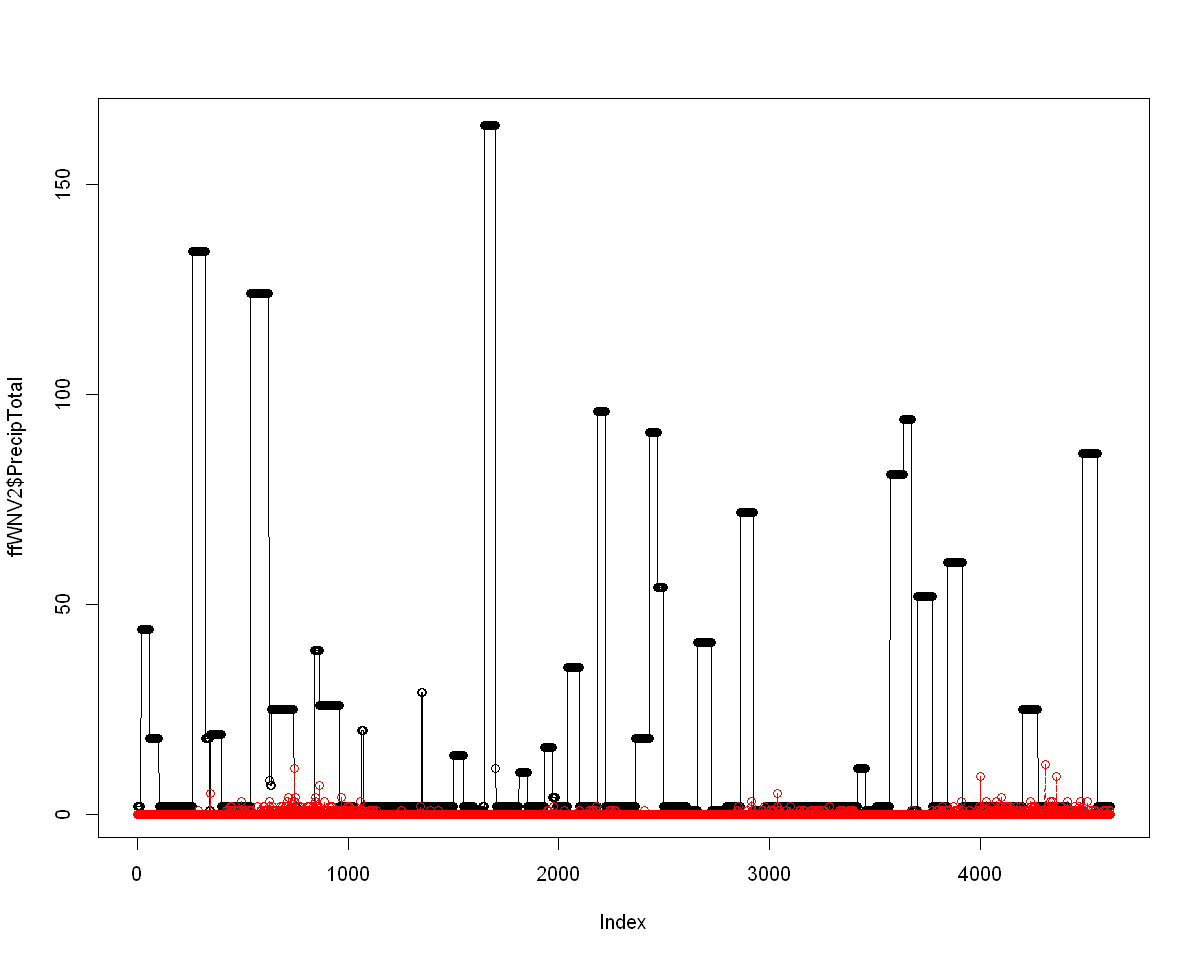

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot(ffWNV2$PrecipTotal, type = "o",)  ## index plot with one variable
lines(ffWNV2$WnvPresent, type = "o", lty = 2, col = "red")  ## add another variable

dev.copy(png, filename="PrecipTotalWnvPresent.jpg");
dev.off ();

In [5]:
ffWNV2$Date<- as.Date(ffWNV2$Date, format = "%Y-%m-%d")

png 
  3

png 
  2

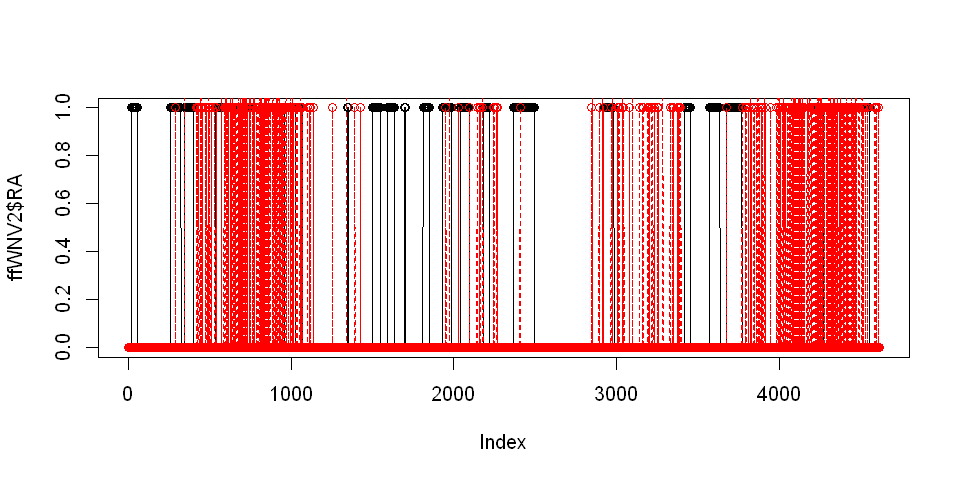

In [5]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(ffWNV2$RA, type = "o",)  ## index plot with one variable
lines(ffWNV2$WnvPresent, type = "o", lty = 2, col = "red")  ## add another variable

dev.copy(png, filename="RAWnvPresent.jpg");
dev.off ();

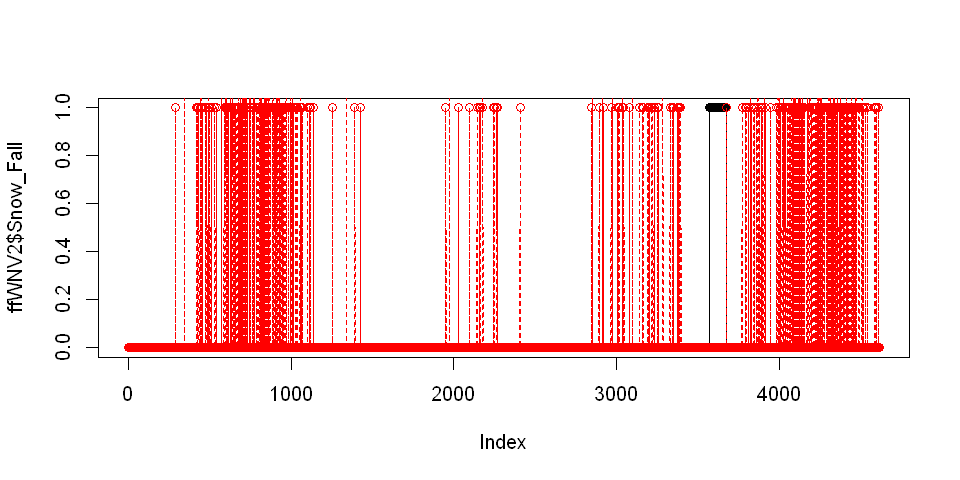

In [46]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot(ffWNV2$Snow_Fall, type = "o",)  ## index plot with one variable
lines(ffWNV2$WnvPresent, type = "o", lty = 2, col = "red")  ## add another variable

In [9]:
y07 <- ffWNV2[which(ffWNV2$Year=='2007'), ]

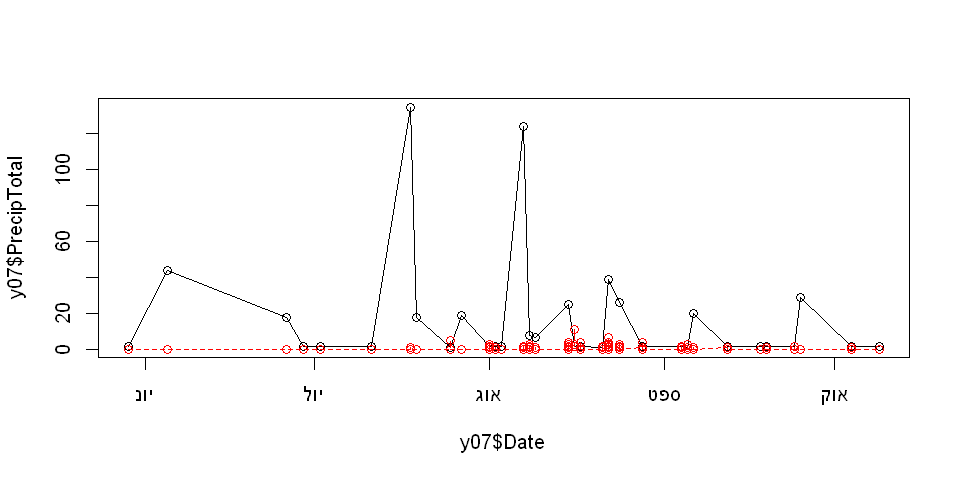

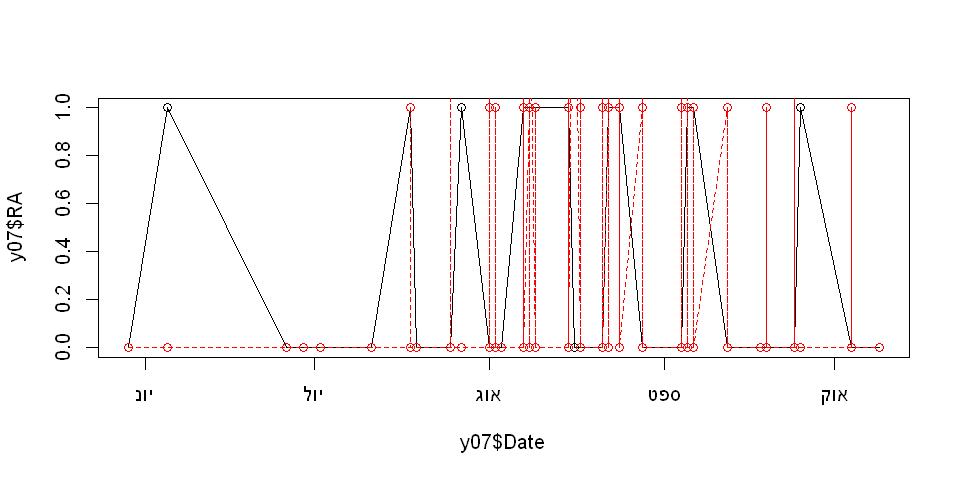

In [10]:
options(repr.plot.width = 8, repr.plot.height = 4)

plot(y07$PrecipTotal~y07$Date , type = "o",)  ## index plot with one variable
lines(y07$WnvPresent~y07$Date, type = "o", lty = 2, col = "red")  ## add another variable

plot(y07$RA~y07$Date, type = "o",)  ## index plot with one variable
lines(y07$WnvPresent~y07$Date, type = "o", lty = 2, col = "red")  ## add another variable
